Generate every level of graph for a survey
APEAL Levels:
Segments vs overall
Segments vs segment average variable
Vehicles in segment vs overall
Vehicles in segment vs segment avg
vehicles in segment vs segment question avg
vehicle average vs segment average for each question
vehicle question vs question average
non-question variable (demographic, etc) histograms - only compare within variable

In [1]:
import pandas as pd
import numpy as np
import km
from itertools import combinations
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def calcHistogramDistance(dist1, dist2):
    t=np.sqrt(dist1*dist2).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    return d

In [29]:
#Load survey files into dataframes
dfList=[]
fileList = ['APEAL data\\16_US_APEAL_SPSS.csv','APEAL data\\15_US_APEAL_SPSS.csv']#,'APEAL data\\14_US_APEAL_SPSS.csv']
for f in fileList:
    print(f)
    df = pd.read_csv(f, dtype=str, error_bad_lines=False)
    df=df.replace(99,np.nan)
    df=df.replace(97.0,np.nan)
    df=df.replace('99',np.nan)
    df=df.replace('97',np.nan)
    df=df.replace(' ',np.nan)
    if 'Make_Series' not in list(df.columns):
        df=df.rename(columns = {'MakeSeries':'Make_Series'})
    
    if 'Demo_Height' not in list(df.columns):
        df=df.rename(columns = {'Demo_Height_Inch':'Demo_Height'})
    dfList.append(df)

APEAL data\16_US_APEAL_SPSS.csv
APEAL data\15_US_APEAL_SPSS.csv


In [40]:
varList1 = ['VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
varList2 = ['DEMO_INCM_1','Demo_AgeBucket','DEMO_US_1B','DEMO_US_1C','DEMO_US_1D','DEMO_US_1E','DEMO_US_1F','DEMO_US_1G','DEMO_US_1H','DEMO_US_1I','DEMO_US_1J','DEMO_US_1K','DEMO_US_1L','Buyer_Segment','YPV_US_1','YNV_US_1A9','YNV_GLB_3','YNV_GLB_4','YNV_GLB_5','YNV_GLB_6','YNV_GLB_7','YNV_GLB_8','YNV_GLB_9','YNV_GLB_10','YNV_GLB_11','YNV_GLB_12','YNV_GLB_14','YNV_GLB_15','YNV_GLB_16','APEAL_OSAT','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
varList3 = ['Make','Segment','Make_Series','DEMO_INCM_1','Demo_AgeBucket','DEMO_US_1B','DEMO_US_1C','DEMO_US_1D','DEMO_US_1E','DEMO_US_1F','DEMO_US_1G','DEMO_US_1H','DEMO_US_1I','DEMO_US_1J','DEMO_US_1K','DEMO_US_1L','Buyer_Segment','YPV_US_1','YNV_US_1A9','YNV_GLB_3','YNV_GLB_4','YNV_GLB_5','YNV_GLB_6','YNV_GLB_7','YNV_GLB_8','YNV_GLB_9','YNV_GLB_10','YNV_GLB_11','YNV_GLB_12','YNV_GLB_14','YNV_GLB_15','YNV_GLB_16','APEAL_OSAT','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
varList4 = ['DEMO_INCM_1','Demo_AgeBucket','DEMO_US_1B','DEMO_US_1C','DEMO_US_1D','DEMO_US_1E','DEMO_US_1F','DEMO_US_1G','DEMO_US_1H','DEMO_US_1I','DEMO_US_1J','DEMO_US_1K','DEMO_US_1L','Buyer_Segment','YPV_US_1','YNV_US_1A9','YNV_GLB_3','YNV_GLB_4','YNV_GLB_5','YNV_GLB_6','YNV_GLB_7','YNV_GLB_8','YNV_GLB_9','YNV_GLB_10','YNV_GLB_11','YNV_GLB_12','YNV_GLB_14','YNV_GLB_15','YNV_GLB_16','APEAL_OSAT']
unorderedVars = ['Demo_Census_4','Demo_Census_9','Buyer_Segment','YPV_US_1','YNV_GLB_11','YNV_GLB_12','YNV_GLB_14']
orderedVars = ['DEMO_INCM_1','Demo_AgeBucket','DEMO_US_1B','DEMO_US_1C','DEMO_US_1D','DEMO_US_1E','DEMO_US_1F','DEMO_US_1G','DEMO_US_1H','DEMO_US_1I','DEMO_US_1J','DEMO_US_1K','DEMO_US_1L','YNV_US_1A9','YNV_GLB_3','YNV_GLB_4','YNV_GLB_5','YNV_GLB_6','YNV_GLB_7','YNV_GLB_8','YNV_GLB_9','YNV_GLB_10','YNV_GLB_15','YNV_GLB_16','APEAL_OSAT']
dfProb = {}
dfProb['2016'] = dfList[0][varList3]
dfProb['2015'] = dfList[1][varList3]

In [41]:
#Create probability distribution Dictionary
minSample = 60
probDist = {}
probDist['2015'] = {}
probDist['2016'] = {}
yearKeys = ['2015', '2016']
for year in yearKeys:
    #Create an overall Probability Distribution
    temp = dfProb[year].iloc[:,3:].apply(pd.value_counts)
    probDist[year]['all'] = temp/temp.sum().T

    #create probability distributions for each Series
    for m in dfProb[year]['Make_Series'].unique():
        temp = dfProb[year][dfProb[year]['Make_Series']==m].iloc[:,3:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        #only create distribution if sample size meets minimum requirements
        if temp['VEXT_R_1'].sum() >= minSample:
            temp['avgQ'] = temp[varList1].sum(axis=1)
            for a in list(temp.columns):
                if temp[a].sum() < minSample:
                    temp[a] = np.nan
            probDist[year][m]=(temp/temp.sum()).fillna(0)
        else:
            #print values not included in probDist
            print(m)

    #create probability distributions for each Segment
    for m in dfProb[year]['Segment'].unique():
        temp = dfProb[year][dfProb[year]['Segment']==m].iloc[:,3:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        #only create distribution if sample size meets minimum requirements
        if temp['VEXT_R_1'].sum() >= minSample:
            temp['avgQ'] = temp[varList1].sum(axis=1)
            for a in list(temp.columns):
                if temp[a].sum() < minSample:
                    temp[a] = np.nan
            probDist[year][m]=(temp/temp.sum()).fillna(0)
        else:
            #print values not included in probDist
            print(m)

    #create probability distributions for each Make
    for m in dfProb[year]['Make'].unique():
        temp = dfProb[year][dfProb[year]['Make']==m].iloc[:,3:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        #only create distribution if sample size meets minimum requirements
        if temp['VEXT_R_1'].sum() >= minSample:
            temp['avgQ'] = temp[varList1].sum(axis=1)
            for a in list(temp.columns):
                if temp[a].sum() < minSample:
                    temp[a] = np.nan
            probDist[year][m]=(temp/temp.sum()).fillna(0)
        else:
            #print values not included in probDist
            print(m)

Infiniti Q60
Lexus LX
Volvo S80
Mercedes-Benz G-Class
Nissan GT-R
Volkswagen Touareg
Nissan Titan
Toyota Land Cruiser
MINI Coupe/Roadster
Audi R8
MINI Paceman
Scion iQ
Land Rover LR2
Jaguar XK
Porsche 918
Honda CR-Z
Chevrolet SS
Hyundai Equus
Audi TT
Hyundai Azera
Ram ProMaster City
Dodge Viper SRT
BMW i3
Fiat 500L
BMW i8
Acura RLX
Audi allroad
Audi A8
BMW Z4
Cadillac ELR
Honda CR-Z
Hyundai Equus
Kia Cadenza
Mercedes-Benz G-Class
Mercedes-Benz SLK-Class
Mercedes-Benz SL-Class
MINI Paceman
Mercedes-Benz Metris
Mercedes-Benz AMG GT
Mitsubishi i-MiEV
Nissan GT-R
Toyota Mirai
Volvo S80
Dodge Viper
Ram ProMaster City
Ford Flex
Ford Taurus
Hyundai Genesis Coupe
Mercedes-Benz B-Class
Jaguar XJ
BMW i8
Mitsubishi Lancer
Infiniti Q70
Kia K900
Lincoln MKS
Nissan Sentra
Infiniti QX60
Lincoln MKT
Toyota Yaris
BMW i3
Chevrolet SS
Fiat 500L
Nissan Quest


In [ ]:
distanceStack = calcHistogramDistance(probDist['all'],probDist['all'])
distanceStack['k1'] = 'all'
distanceStack['k2'] = 'all'
distanceStack = distanceStack.to_frame()
ks = list(probDist.keys())
for k1, k2 in combinations(ks, 2):
    d = calcHistogramDistance(probDist[k1],probDist[k2])
    d['k1'] = k1
    d['k2'] = k2
    distanceStack = pd.concat([distanceStack,d.to_frame()], axis=1)

In [ ]:
dStack = distanceStack.T

In [ ]:
dStack

In [ ]:
A=dStack[dStack['k1']=='all'].set_index('k2').drop('k1',axis=1)
del(A.index.name)

In [ ]:
B=dStack[dStack['k2']=='all'].set_index('k1').drop('k2',axis=1)
del(B.index.name)

In [ ]:
dfAll = pd.concat([A,B])
dfAll = dfAll.ix[1:]

In [ ]:
dfAll

In [ ]:
df = dfList[0]
distAvgList = []
for segment in df['Segment'].unique():
#segment = 'Large Car'
#assemble distance matrix with segment easily indexable
    A=dStack[dStack['k1']==segment].set_index('k2').drop('k1',axis=1)
    del(A.index.name)
    B=dStack[dStack['k2']==segment].set_index('k1').drop('k2',axis=1)
    del(B.index.name)
    dfAll = pd.concat([A,B])
    dfAll = dfAll.ix[1:]
    dfAllQ = dfAll[varList1]
    #using Segment-specific matrix, get distances for each vehicle in matrix
    models = list(df[df['Segment']==segment]['Make_Series'].unique())
    modelList = list(dfAll.index)
    for model in models:
        if model in modelList:
            m = df[df['Make_Series']==model]['APEAL_Index'].mean()
            d = dfAllQ.loc[model,:].fillna(0)
            d=np.sqrt(np.dot(d,d))
            distAvgList.append([model,segment,d,m])

In [ ]:
distAvgMatrix = pd.DataFrame(distAvgList, columns=['Make_Series','Segment','Distance','APEAL Score'])
distAvgMatrix = distAvgMatrix.set_index('Make_Series')
del(distAvgMatrix.index.name)
distAvgMatrix

In [ ]:
plt.scatter(distAvgMatrix['APEAL Score'],distAvgMatrix['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance to Segment vs Average for All Segments')
for txt in list(distAvgMatrix.index.values):
    if distAvgMatrix.loc[txt,'Distance']>.13:
        plt.annotate(txt, (distAvgMatrix.loc[txt,'APEAL Score'],distAvgMatrix.loc[txt,'Distance']))

In [ ]:
#generates question distance graphs for all models and segments
for segment in distAvgMatrix['Segment'].unique():
    distAvgSegMatrix = distAvgMatrix[distAvgMatrix['Segment']==segment]
    plt.scatter(distAvgSegMatrix['APEAL Score'],distAvgSegMatrix['Distance'])
    plt.xlabel('APEAL Index')
    plt.ylabel('Distance from Segment Average')
    axes = plt.gca()
    #axes.set_xlim([0,.5])
    axes.set_ylim([0,0.4])
    plt.title('Distance to Segment vs Average for ' + segment + ' Segment')
    for txt in list(distAvgSegMatrix.index.values):
        if distAvgSegMatrix.loc[txt,'Distance']>0.0:
            plt.annotate(txt, (distAvgSegMatrix.loc[txt,'APEAL Score'],distAvgSegMatrix.loc[txt,'Distance']))
    plotString = 'APEAL distance plots\\plot_' + segment + '.png'
    plt.savefig(plotString)
    plt.clf()

In [ ]:
dfAllQT

In [ ]:
series = 'Nissan Altima'
qDist = dfAllQ.T[series]
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,qDist],axis=1).dropna()

In [ ]:
#plot all series question distances vs question average values
dfAllQT = dfAllQ.T
vehicleList = list(dfAllQ.index)
for series in df['Make_Series'].unique():
    if series not in vehicleList:
        continue
    qDist = dfAllQT[series]
    temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
    tempdf = pd.concat([temp,qDist],axis=1)
    #print(series)
    plt.scatter(tempdf['APEAL Score'],tempdf[series])
    plt.xlabel('APEAL Score')
    plt.ylabel('Question Distance from Segment Average')
    axes = plt.gca()
    axes.set_xlim([7,10])
    axes.set_ylim([0,0.4])
    plt.title('Distance to Segment vs Average')
    for txt in list(tempdf.index.values):
        if tempdf.loc[txt,series]>(qDist.sort_values(ascending=False)[3]*.75):
            plt.annotate(txt, (tempdf.loc[txt,'APEAL Score'],tempdf.loc[txt,series]))
    plotString = 'APEAL distance plots\\questionplot_' + str(series).replace('/','-') + '.png'
    plt.savefig(plotString)
    #plt.savefig('plot.png')
    plt.clf()

In [ ]:
#compare each vehicle question to their own question average, create graph
vehicleList = list(probDist.keys())
for series in df['Make_Series'].unique():
    if series not in vehicleList:
        continue
    
    #multiplying by a series, need to use a different multiplication step
    t=np.sqrt(probDist[series][varList1].mul(probDist[series]['avgQ'],axis=0)).sum()
    t=t[t!=0]
    qDist=np.log(t)*-1
    temp = pd.DataFrame(np.matmul(np.array(probDist[series].index).astype(float),probDist[series].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[series].columns)
    tempdf = pd.concat([temp,qDist],axis=1)
    #print(series)
    plt.scatter(tempdf['APEAL Score'],tempdf[0])
    plt.xlabel('APEAL Score')
    plt.ylabel('Question Distance from Segment Average')
    axes = plt.gca()
    axes.set_xlim([3,10])
    axes.set_ylim([0,0.5])
    plt.title('Distance to Segment vs Average')
    for txt in list(tempdf.index.values):
        if tempdf.loc[txt,0]>(qDist.sort_values(ascending=False)[3]*.75):
            plt.annotate(txt, (tempdf.loc[txt,'APEAL Score'],tempdf.loc[txt,0]))
    plotString = 'APEAL distance plots\\selfQplot_' + str(series).replace('/','-') + '.png'
    plt.savefig(plotString)
    #plt.savefig('plot.png')
    plt.clf()

In [ ]:
#plot ordered demographics distances for series, segment or make
probDist['Nissan']

In [ ]:
import pickle
pickle.dump( (probDist, distanceStack), open( "probDistFile.p", "wb" ) )

In [ ]:
import pickle
probDist, distanceStack = pickle.load( open( "probDistFile.p", "rb" ) )
distanceStack = distanceStack.T.iloc[1:]

In [ ]:
distanceStack

In [ ]:
distanceStack2 = distanceStack.copy()
distanceStack2 = distanceStack2.drop(['k1','k2'], axis=1)
distanceStack2['k1'] = distanceStack['k2'].values
distanceStack2['k2'] = distanceStack['k1'].values
distanceStack2

In [ ]:
distanceStack3 = pd.concat([distanceStack, distanceStack2])
distanceStack3

In [ ]:
#create graph of income distance vs avg for each series
var = 'YNV_GLB_3'
matrix = []
dfAll = distanceStack3[distanceStack3['k1']=='all'].set_index('k2').drop('k1', axis=1).fillna(0)
del(dfAll.index.name)
for series in dfAll.index:
    temp = pd.DataFrame(np.matmul(np.array(probDist[series].index).astype(float),probDist[series].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[series].columns)
    matrix.append([series, temp.loc[var]['APEAL Score'], dfAll.loc[series, var]])
    
matrix = pd.DataFrame(matrix, columns=['Series','average','distance'])
matrix = matrix.set_index('Series')
del(matrix.index.name)
matrix=matrix.drop(matrix[matrix['distance']==0].index)

In [ ]:
matrix=matrix.drop(matrix[matrix['distance']==0].index)

In [ ]:
plt.scatter(matrix['average'],matrix['distance'])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Overall Average')
plt.title('Distance to overall vs Average for All Segments')
for txt in list(matrix.index.values):
    if matrix.loc[txt,'distance']>.05:
        plt.annotate(txt, (matrix.loc[txt,'average'],matrix.loc[txt,'distance']))

In [ ]:
#create graph of income distance vs avg for each series
matrix = []
for segment in dfList[0]['Segment'].unique():
    temp = pd.DataFrame(np.matmul(np.array(probDist[segment].index).astype(float),probDist[segment].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[segment].columns)
    matrix.append([segment, temp.loc[var]['APEAL Score'], dfAll.loc[segment, var]])
    
matrix = pd.DataFrame(matrix, columns=['Series','average','distance'])
matrix = matrix.set_index('Series')
del(matrix.index.name)
matrix=matrix.drop(matrix[matrix['distance']==0].index)

In [ ]:
matrix

In [ ]:
plt.scatter(matrix['average'],matrix['distance'])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Overall Average')
plt.title('Distance to overall vs Average for All Segments')
for txt in list(matrix.index.values):
    if matrix.loc[txt,'distance']>.02:
        plt.annotate(txt, (matrix.loc[txt,'average'],matrix.loc[txt,'distance']))

In [ ]:
#create graph of income distance vs avg for each series
matrix = []
df = dfList[0]
for segment in df['Segment'].unique():
    vehicleList = set(df[df['Segment']==segment]['Make_Series'].unique())
    vehicleList = vehicleList.intersection(set(probDist.keys()))
    for series in vehicleList:
        temp = pd.DataFrame(np.matmul(np.array(probDist[series].index).astype(float),probDist[series].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[series].columns)
        distance = distanceStack3[distanceStack3['k1']==segment]
        distance = distance[distance['k2']==series][var][0]
        matrix.append([series, segment, temp.loc[var]['APEAL Score'], distance])
    
matrix = pd.DataFrame(matrix, columns=['Series','Segment','average','distance'])
matrix = matrix.set_index('Series').dropna()
del(matrix.index.name)
matrix=matrix.drop(matrix[matrix['distance']==0].index)

In [ ]:
matrix

In [ ]:
plt.scatter(matrix['average'],matrix['distance'])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Overall Average')
plt.title('Distance to overall vs Average for All Segments')
for txt in list(matrix.index.values):
    if matrix.loc[txt,'distance']>.05:
        plt.annotate(txt, (matrix.loc[txt,'average'],matrix.loc[txt,'distance']))

In [ ]:
segMatrix = matrix[matrix['Segment']=='Small Car']
plt.scatter(segMatrix['average'],segMatrix['distance'])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Distance to segment vs model Average')
for txt in list(segMatrix.index.values):
    if segMatrix.loc[txt,'distance']>.02:
        plt.annotate(txt, (segMatrix.loc[txt,'average'],segMatrix.loc[txt,'distance']))

Distance between time

In [63]:
distanceStack = calcHistogramDistance(probDist['2015']['all'],probDist['2016']['all'])
distanceStack['variable'] = 'all'
distanceStack = distanceStack.to_frame()
keys2016 = set(probDist['2016'].keys())
keys2015 = set(probDist['2015'].keys())
for k in keys2016.intersection(keys2015):
    d = calcHistogramDistance(probDist['2015'][k],probDist['2016'][k])
    d['variable'] = k
    distanceStack = pd.concat([distanceStack,d.to_frame()], axis=1)

distanceStack = distanceStack.T.set_index('variable')
del(distanceStack.index.name)

In [64]:
distanceStack

,APEAL_OSAT,Buyer_Segment,DEMO_INCM_1,DEMO_US_1B,DEMO_US_1C,DEMO_US_1D,DEMO_US_1E,DEMO_US_1F,DEMO_US_1G,DEMO_US_1H,...,YNV_GLB_3,YNV_GLB_4,YNV_GLB_5,YNV_GLB_6,YNV_GLB_7,YNV_GLB_8,YNV_GLB_9,YNV_US_1A9,YPV_US_1,avgQ
all,7.6702e-05,2.24197e-05,0.000178135,8.91417e-06,8.45719e-05,9.85665e-05,4.67658e-06,5.70447e-05,7.2078e-06,1.67255e-05,...,3.61515e-05,1.03498e-05,7.07857e-05,7.34374e-05,8.59098e-05,0.000696164,0.000229926,0.000326683,4.41071e-05,NaN
Kia Forte,0.00668577,0.00288695,0.00433237,0.00695761,0.00493767,0.00308297,0.000911112,0.00076267,0.00120375,0.00358332,...,0.00409813,0.000128142,0.003148,0.00197295,0.00367875,0.00680766,0.00506847,0.00488321,0.0016055,0.00227926
Subaru BRZ,0.0165891,0.0115156,0.0336447,0.0144599,0.0109796,0.0022294,0.000190818,0.00551564,0.00126271,0.00263286,...,0.00269267,0.0105457,0.0187681,0.00676446,0.0106314,0.00306741,0.0057907,0.0199649,0.00231725,0.00180647
Volvo V60,0.0199469,0.00443266,0.0580741,0.00485499,0.00364636,0.00199088,0.0158322,0.0111695,0.0132821,0.00745268,...,0.00655893,0.0102538,0.0183731,0.0193523,0.0108383,0.00711733,0.0115901,0.00951155,0.0034268,0.00187586
Honda Fit,0.00654228,0.00359458,0.00842532,0.00101184,0.00315559,0.00363644,0.00283717,0.00282994,0.00292743,0.00117622,...,0.00271155,0.00153647,0.00278099,0.00311458,0.00671084,0.00597232,0.00706868,0.00836847,0.000179306,0.000578181
Toyota Tacoma,0.00496294,0.0148175,0.0237555,0.0015573,0.00132451,0.000709511,0.0038385,0.00130795,0.0211719,0.00299878,...,0.00336469,0.00319636,0.000887529,0.00180523,0.00445881,0.00852161,0.00794379,0.00399948,0.00351677,0.00186431
Lexus ES,0.00705247,0.00428772,0.0176995,0.00557138,0.00246429,0.00445669,0.00250145,0.000948355,0.00190087,0.000258958,...,0.00154595,0.00207846,0.000983249,0.00505949,0.000301085,0.00277078,0.00404555,0.00227188,0.00421379,0.000266978
Ford Transit Connect,0.0354316,0.0211302,NaN,0.0116476,0.00385073,0.0130716,0.00148225,0.00239302,0.00162141,0.00954443,...,0.01259,0.0188794,0.0150195,0.0222301,0.0323272,0.0314288,0.00631464,0.013546,0.010991,0.00688186
Mercedes-Benz C-Class,0.0100903,0.00681847,0.010868,0.00235756,0.000412577,0.00517331,0.00147013,0.000762675,0.00122195,0.0013889,...,0.00273858,0.00365409,0.0048074,0.0036343,0.00486548,0.00797731,0.00122066,0.00763736,0.00243423,0.000991644
BMW,0.00117865,0.000158357,0.000646683,8.65533e-05,0.00017375,0.000250849,0.000225826,4.98312e-05,8.93199e-05,8.30837e-05,...,0.00035544,0.000501589,0.000327321,0.000679813,0.000125741,0.00133331,0.000768785,0.000578505,5.49809e-05,0.000394132


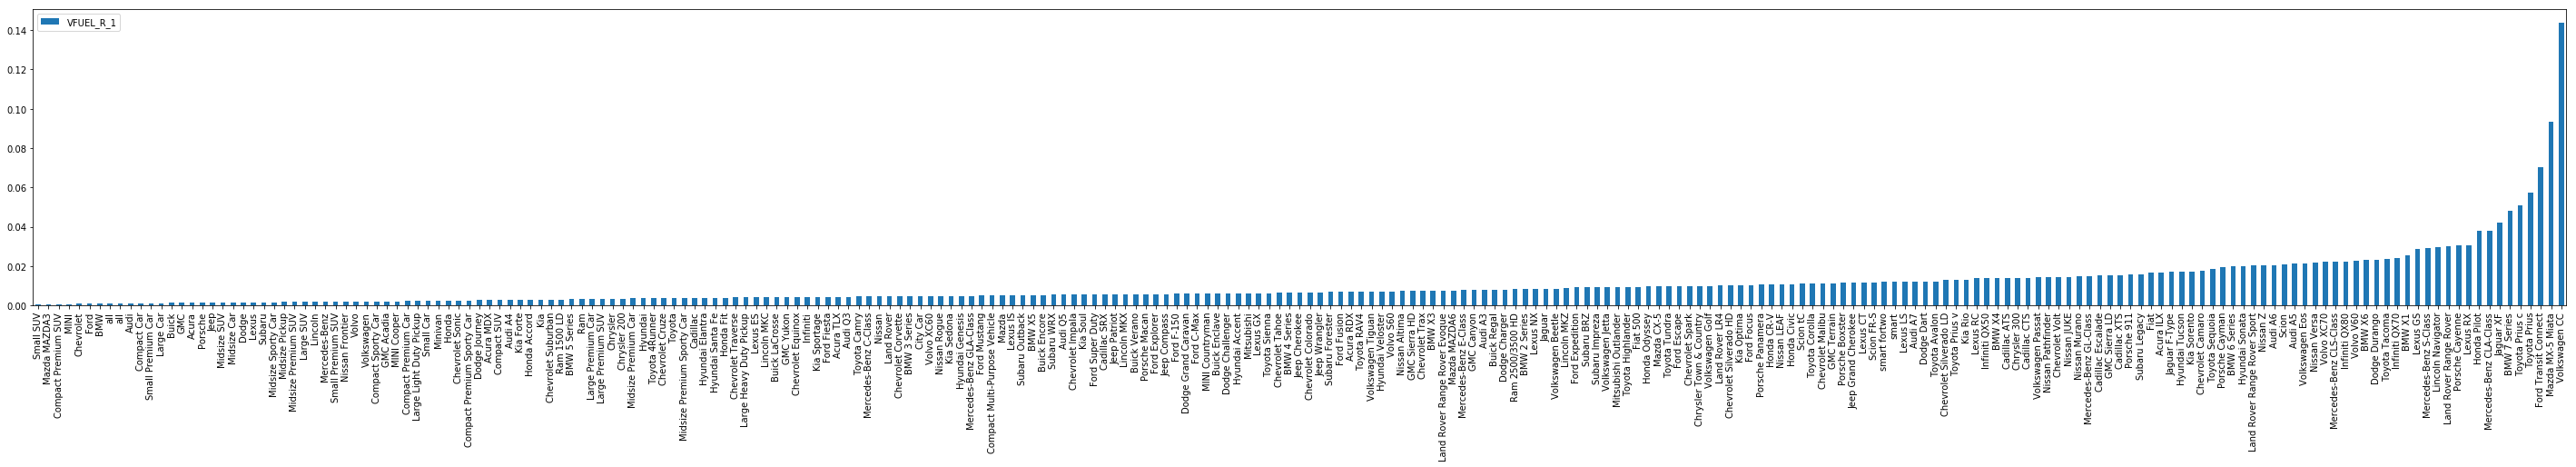

In [73]:
distanceStack[['VFUEL_R_1']].dropna().sort_values(by='VFUEL_R_1').plot.bar(figsize = (50,6))

In [72]:
distanceStack.max().sort_values()

DEMO_US_1H        0.019371
avgQ              0.020207
DEMO_US_1B        0.021203
DEMO_US_1I        0.021345
DEMO_US_1G        0.022536
DEMO_US_1L        0.022792
YNV_GLB_15        0.024318
YPV_US_1          0.026231
YNV_GLB_4         0.027569
YNV_GLB_5         0.029485
DEMO_US_1E        0.031084
YNV_GLB_8         0.031429
YNV_GLB_9         0.032510
DEMO_US_1K        0.036250
VVDS_R_4          0.037243
DEMO_US_1J        0.039710
VSEAT_R_11        0.040083
VSEAT_R_7         0.040248
YNV_GLB_7         0.041671
DEMO_US_1C        0.044153
DEMO_US_1D        0.045082
YNV_GLB_14        0.045591
VINT_R_7          0.046045
VEXT_R_2          0.046052
VAEN_R_2          0.047447
VSEAT_R_1         0.048252
Demo_AgeBucket    0.048260
VINT_R_2          0.048261
VDRD_R_9          0.048865
VSEAT_R_3         0.049142
                    ...   
VVDS_R_6          0.072930
VEXT_R_6          0.073233
VEXT_R_5          0.073420
VDRD_R_7          0.074619
DEMO_INCM_1       0.075733
YNV_GLB_6         0.078741
V

In [42]:
dfProb['2016'][varList3]#['DEMO_INCM_1'][0]

,Make,Segment,Make_Series,DEMO_INCM_1,Demo_AgeBucket,DEMO_US_1B,DEMO_US_1C,DEMO_US_1D,DEMO_US_1E,DEMO_US_1F,...,VVDS_R_2,VVDS_R_3,VVDS_R_4,VVDS_R_5,VVDS_R_6,VVDS_R_7,VVDS_R_8,VFUEL_R_1,VFUEL_R_2,VFUEL_R_3
0,Cadillac,Midsize Premium Car,Cadillac CTS,13,12,4,4,1,3,3,...,9,6,7,9,NaN,9,9,5,5,5
1,Cadillac,Midsize Premium Car,Cadillac CTS,10,10,4,4,2,3,1,...,10,10,10,10,10,10,10,10,10,10
2,Cadillac,Midsize Premium Car,Cadillac CTS,NaN,12,3,3,3,2,2,...,9,9,9,9,8,9,9,8,9,9
3,Cadillac,Large Premium SUV,Cadillac Escalade,15,12,4,4,3,4,3,...,9,5,10,6,7,8,9,4,4,4
4,Cadillac,Midsize Premium SUV,Cadillac SRX,14,7,3,4,2,3,3,...,8,7,8,7,6,8,7,5,5,5
5,Cadillac,Midsize Premium SUV,Cadillac SRX,NaN,11,3,4,3,3,3,...,10,10,10,10,10,10,10,10,10,10
6,Cadillac,Midsize Premium SUV,Cadillac SRX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cadillac,Midsize Premium Car,Cadillac CTS,NaN,NaN,4,3,1,2,2,...,7,4,4,7,1,7,6,5,5,5
8,Cadillac,Midsize Premium Car,Cadillac XTS,NaN,12,4,3,3,3,2,...,8,9,7,8,8,9,8,5,7,6
9,Cadillac,Midsize Premium Car,Cadillac XTS,14,12,2,3,1,2,1,...,6,9,7,5,3,6,4,5,4,5
